# Problem Statement
New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand. Airbnb challenges you to predict in which country a new user will make his or her first booking

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.

# DATA DICTOINARY 


train_users.csv - the training set of users
test_users.csv - the test set of users
id: user id
date_account_created: the date of account creation
timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
date_first_booking: date of first booking
gender
age
signup_method
signup_flow: the page a user came to signup up from
language: international language preference
affiliate_channel: what kind of paid marketing
affiliate_provider: where the marketing is e.g. google, craigslist, other
first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
signup_app
first_device_type
first_browser
country_destination: this is the target variable you are to predict
sessions.csv - web sessions log for users
user_id: to be joined with the column 'id' in users table
action
action_type
action_detail
device_type
secs_elapsed
countries.csv - summary statistics of destination countries in this dataset and their locations
age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination
sample_submission.csv - correct format for submitting your predictions

In [1]:
# Required Imports:
import math , time, random, datetime 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as statmodel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from pandas.api.types import is_string_dtype,is_numeric_dtype
%matplotlib inline
plt.rcParams
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score,f1_score

import math
import warnings
warnings.filterwarnings('ignore')

# Importing CSV files

In [6]:
train = pd.read_csv('C:/Users/sumee/Downloads/Dataset/train_users_2.csv')
test = pd.read_csv('C:/Users/sumee/Downloads/Dataset/test_users.csv')

In [7]:
train.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


In [8]:
test.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari


In [9]:
print(train.shape,test.shape)

(213451, 16) (62096, 15)


# DATA PREPROCCESSING

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [11]:
# Converting Object to Category
def str_to_cat(train):
    for p,q in train.items(): #my_df.items() is a generator in Python gives the keys along with its values
        if is_string_dtype(q): #p - key, q - valu
            train[p] = q.astype('category').cat.as_ordered()
    return train

In [12]:
train = str_to_cat(train)
train.info()
labels = train['country_destination'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null category
date_account_created       213451 non-null category
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null category
gender                     213451 non-null category
age                        125461 non-null float64
signup_method              213451 non-null category
signup_flow                213451 non-null int64
language                   213451 non-null category
affiliate_channel          213451 non-null category
affiliate_provider         213451 non-null category
first_affiliate_tracked    207386 non-null category
signup_app                 213451 non-null category
first_device_type          213451 non-null category
first_browser              213451 non-null category
country_destination        213451 non-null category
dtypes: category(13), float64(1), int64(2)
memory usage: 20.4 MB


In [13]:
# Converting Object to Category in Test Data
test = str_to_cat(test)
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [14]:
# Finding Missing Values
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'id': 0,
 'date_account_created': 0,
 'timestamp_first_active': 0,
 'date_first_booking': 124543,
 'gender': 0,
 'age': 87990,
 'signup_method': 0,
 'signup_flow': 0,
 'language': 0,
 'affiliate_channel': 0,
 'affiliate_provider': 0,
 'first_affiliate_tracked': 6065,
 'signup_app': 0,
 'first_device_type': 0,
 'first_browser': 0,
 'country_destination': 0}

In [15]:
print(train.age.min())
print(train.age.max())
avg_age = train.age.mean()
median_age = train.age.median()
print(avg_age)
print(median_age)

1.0
2014.0
49.66833517985669
34.0


In [16]:
# Some age values are incorrect, like close to 2000 and less than 18 , so cleaning such data
train['age']=train['age'].apply(lambda x : 34 if x>100 else x)
train['age']=train['age'].apply(lambda x : 34 if x<18 else x)
print(train.age.min())
print(train.age.max())
avg_age = train.age.mean()
median_age = train.age.median()
print(avg_age)
print(median_age)

18.0
100.0
36.52423462271144
34.0


In [17]:
# Replacing Missing value of age with Median value
train['age'].fillna(median_age, inplace=True)
print(train['age'].isnull().sum()/len(train['age'])*100)

0.0


In [18]:
# Dataset without where no Booking was found. It wont make any sense while training rows where no booking is made
train2= train[train.country_destination !='NDF']
train2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,34.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


# To convert the dates into datetime format

In [19]:
train2.date_account_created=pd.to_datetime(train2.date_account_created)
train2.date_first_booking=pd.to_datetime(train2.date_first_booking)
train2['timestamp_first_active'] = pd.to_datetime((train2.timestamp_first_active)//1000000, format='%Y%m%d')

In [20]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88908 entries, 2 to 213445
Data columns (total 16 columns):
id                         88908 non-null category
date_account_created       88908 non-null datetime64[ns]
timestamp_first_active     88908 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     88908 non-null category
age                        88908 non-null float64
signup_method              88908 non-null category
signup_flow                88908 non-null int64
language                   88908 non-null category
affiliate_channel          88908 non-null category
affiliate_provider         88908 non-null category
first_affiliate_tracked    87170 non-null category
signup_app                 88908 non-null category
first_device_type          88908 non-null category
first_browser              88908 non-null category
country_destination        88908 non-null category
dtypes: category(11), datetime64[ns](3), float64(1), int64(1

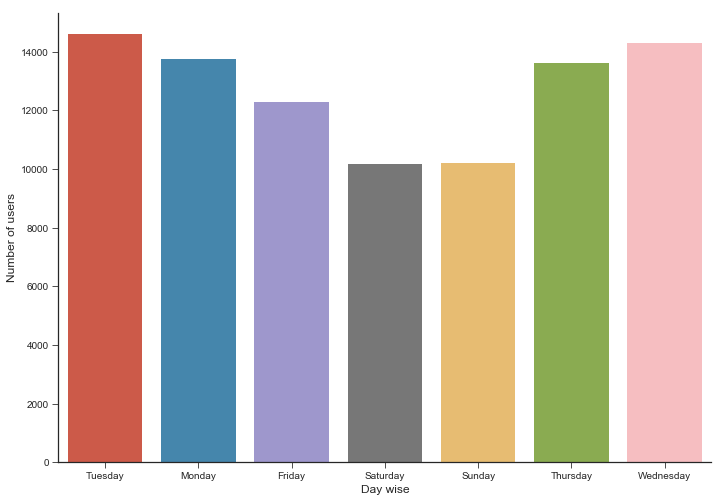

In [21]:
train2['date_account_created_day'] = train2.date_account_created.dt.weekday_name
train2['date_account_created_month'] = train2.date_account_created.dt.month
train2['date_account_created_year'] = train2.date_account_created.dt.year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='date_account_created_day',data=train2)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()

In [22]:
# Observation : User activity is low on saturday and sunday . So chance of booking on saturdays , sundays is pretty low .

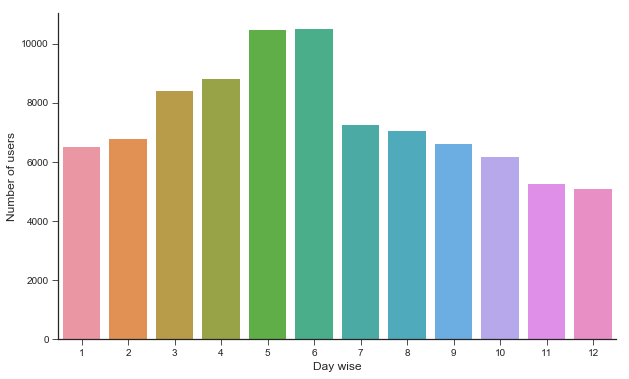

In [23]:
# Total number of bookings by month
train2['date_first_booking_day'] = train2.date_first_booking.dt.weekday_name
train2['date_first_booking_month'] = train2.date_first_booking.dt.month
train2['date_first_booking_year'] = train2.date_first_booking.dt.year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
#train2 = train2[train2['country_destination']!='US']
#train3= train2[train2['country_destination']!='NDF']
sns.countplot(x='date_first_booking_month',data=train2)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()

In [24]:
# Observation : User booking in the month of 5 and 6 are maximum. So chance of booking on MAY and JUNE is pretty high .

In [25]:
train2['first_affiliate_tracked'].unique()

[untracked, omg, NaN, linked, tracked-other, product, marketing, local ops]
Categories (7, object): [linked < local ops < marketing < omg < product < tracked-other < untracked]

In [26]:
train3 = train2[train2.first_affiliate_tracked !='Nan']

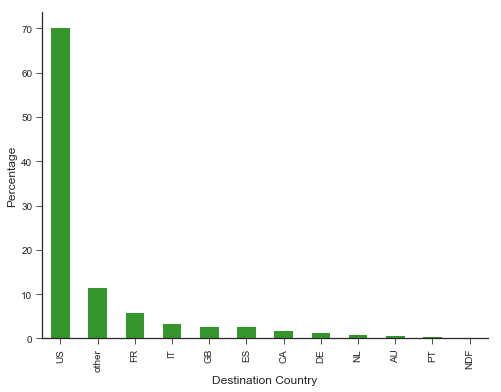

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
destination_percentage = train3.country_destination.value_counts() / train3.shape[0] * 100
destination_percentage.plot(kind='bar',color='#34962B')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

In [28]:
# Observation : Predicting geo location of users based on country_destination preference may be useful

In [31]:
# Since almost 70% of the people have booked destination for US converting the dataframe for binary classification  

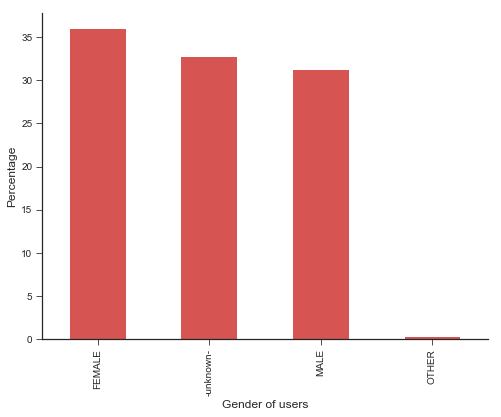

In [32]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
gender_percentage = train3.gender.value_counts() / train3.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D65452')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

In [33]:
#Removing Unkown values for gender.
train3 = train3[train3.gender !='-unknown-']

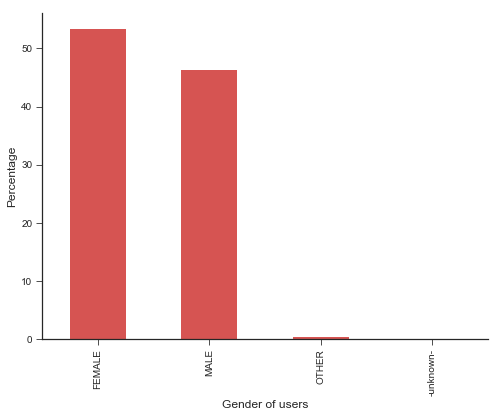

In [34]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
gender_percentage = train3.gender.value_counts() / train3.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D65452')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

In [35]:
# Converting the additional Coulumn to Category type
train4 = str_to_cat(train3)
train4.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,date_first_booking_day,date_first_booking_month,date_first_booking_year
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,Tuesday,9,2010,Monday,8,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Web,Mac Desktop,Firefox,other,Monday,12,2011,Saturday,9,2012
6,lsw9q7uk0j,2010-01-02,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,Saturday,1,2010,Tuesday,1,2010
7,0d01nltbrs,2010-01-03,2010-01-03,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,Sunday,1,2010,Wednesday,1,2010
8,a1vcnhxeij,2010-01-04,2010-01-04,2010-07-29,FEMALE,50.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,Monday,1,2010,Thursday,7,2010


In [36]:
# Removing columns which would be in any use for analysis/prediction
final_train = train4.drop(["id","date_account_created","date_first_booking","timestamp_first_active"],axis=1)
final_train.head(5)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,date_first_booking_day,date_first_booking_month,date_first_booking_year
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Tuesday,9,2010,Monday,8,2010
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Monday,12,2011,Saturday,9,2012
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Saturday,1,2010,Tuesday,1,2010
7,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,Sunday,1,2010,Wednesday,1,2010
8,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Monday,1,2010,Thursday,7,2010


# One Hot Encoding

In [37]:
final_train['age']=final_train['age'].apply(lambda x : 1 if (x>15 and x<31)  else x)
final_train['age']=final_train['age'].apply(lambda x : 2 if (x>30 and x<51)  else x)
final_train['age']=final_train['age'].apply(lambda x : 3 if (x>50 and x<76)  else x)
final_train['age']=final_train['age'].apply(lambda x : 4 if (x>75 and x<101)  else x)
# Since the dataset is highly skewed making US = 1 and All others = 0 
final_train['country_destination']=final_train['country_destination'].apply(lambda x : 1 if x == 'US' else 0)
final_train.head(5)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,date_first_booking_day,date_first_booking_month,date_first_booking_year
2,FEMALE,3.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1,Tuesday,9,2010,Monday,8,2010
3,FEMALE,2.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,0,Monday,12,2011,Saturday,9,2012
6,FEMALE,2.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,1,Saturday,1,2010,Tuesday,1,2010
7,FEMALE,2.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,1,Sunday,1,2010,Wednesday,1,2010
8,FEMALE,2.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,1,Monday,1,2010,Thursday,7,2010


In [38]:
#Imputing 
def mydf_to_nums(final_train, feature, null_status):
    if not is_numeric_dtype(feature):
        final_train[null_status] = feature.cat.codes + 1
        
def mydf_imputer(final_train, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            final_train[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            final_train[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(final_train, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in final_train.items(): 
        null_table = mydf_imputer(final_train, q, p, null_table)
    for p,q in final_train.items(): 
        mydf_to_nums(final_train, q, p)
    final_train = pd.get_dummies(final_train, dummy_na = True)
    res = [final_train, null_table]
    return res

In [39]:
final_train,my_table = mydf_preprocessor(final_train,null_table = None)
final_train.head(5)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year,date_first_booking_day,date_first_booking_month,date_first_booking_year
2,2,3.0,1,3,6,3,5,7,3,7,22,1,6,9,2010,2,8,2010
3,2,2.0,2,0,6,3,5,7,3,4,18,0,2,12,2011,3,9,2012
6,2,2.0,1,0,6,4,3,7,3,4,42,1,3,1,2010,6,1,2010
7,2,2.0,1,0,6,3,5,4,3,4,42,1,4,1,2010,7,1,2010
8,2,2.0,1,0,6,4,3,7,3,4,42,1,2,1,2010,5,7,2010


In [40]:
# Spliting Dataset into Train and Valid Dataset
def mydf_splitter(final_train,num_rows):
    return final_train[:num_rows].copy(),final_train[num_rows:]


final_train,valid = mydf_splitter(final_train,47912)

print(final_train.shape,valid.shape)

(47912, 18) (11978, 18)


In [41]:
X_train = final_train.drop("country_destination",axis = 1)
Y_train = final_train["country_destination"]
print(X_train.shape,Y_train.shape)

(47912, 17) (47912,)


In [42]:
X_valid = valid.drop("country_destination",axis = 1)
Y_valid = valid["country_destination"]
print(X_valid.shape,Y_valid.shape)

(11978, 17) (11978,)


# DATA PREPROCCESING ON TEST DATA SET

In [43]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [44]:
test['age']=test['age'].apply(lambda x : 34 if x>100 else x)
test['age']=test['age'].apply(lambda x : 34 if x<18 else x)
print(test.age.min())
print(test.age.max())
avg_age_test = test.age.mean()
median_age_test = test.age.median()
print(avg_age_test)
print(median_age_test)

18.0
100.0
34.180734497290786
31.0


In [45]:
# Replacing Missing value of age with Median value
test['age'].fillna(median_age_test, inplace=True)
print(test['age'].isnull().sum()/len(test['age'])*100)

0.0


In [46]:
test.date_account_created=pd.to_datetime(test.date_account_created)
test.date_first_booking=pd.to_datetime(test.date_first_booking)
test['timestamp_first_active'] = pd.to_datetime((test.timestamp_first_active)//1000000, format='%Y%m%d')
test['date_account_created_day'] = test.date_account_created.dt.weekday_name
test['date_account_created_month'] = test.date_account_created.dt.month
test['date_account_created_year'] = test.date_account_created.dt.year

In [47]:
test2 = test[test.first_affiliate_tracked !='Nan']

In [48]:
test2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_day,date_account_created_month,date_account_created_year
0,5uwns89zht,2014-07-01,2014-07-01,NaT,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Tuesday,7,2014
1,jtl0dijy2j,2014-07-01,2014-07-01,NaT,-unknown-,31.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Tuesday,7,2014
2,xx0ulgorjt,2014-07-01,2014-07-01,NaT,-unknown-,31.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,Tuesday,7,2014
3,6c6puo6ix0,2014-07-01,2014-07-01,NaT,-unknown-,31.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,Tuesday,7,2014
4,czqhjk3yfe,2014-07-01,2014-07-01,NaT,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,Tuesday,7,2014


In [49]:
#Removing Unkown values for gender.
test3 = test2[test2.gender !='-unknown-']

In [50]:
# Converting the additional Coulumn to Category type
test4 = str_to_cat(test3)
test4.info()
test_ids = test4['id']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28304 entries, 0 to 62095
Data columns (total 18 columns):
id                            28304 non-null category
date_account_created          28304 non-null datetime64[ns]
timestamp_first_active        28304 non-null datetime64[ns]
date_first_booking            0 non-null datetime64[ns]
gender                        28304 non-null category
age                           28304 non-null float64
signup_method                 28304 non-null category
signup_flow                   28304 non-null int64
language                      28304 non-null category
affiliate_channel             28304 non-null category
affiliate_provider            28304 non-null category
first_affiliate_tracked       28292 non-null category
signup_app                    28304 non-null category
first_device_type             28304 non-null category
first_browser                 28304 non-null category
date_account_created_day      28304 non-null category
date_account_crea

In [51]:
# Removing columns which would be in any use for analysis/prediction
final_test = test4.drop(["id","date_account_created","date_first_booking","timestamp_first_active"],axis=1)
final_test.head(5)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_day,date_account_created_month,date_account_created_year
0,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Tuesday,7,2014
5,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,Tuesday,7,2014
6,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,Tuesday,7,2014
11,FEMALE,30.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,Tuesday,7,2014
12,MALE,24.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Safari,Tuesday,7,2014


In [52]:
final_test['age']=final_test['age'].apply(lambda x : 1 if (x>15 and x<31)  else x)
final_test['age']=final_test['age'].apply(lambda x : 2 if (x>30 and x<51)  else x)
final_test['age']=final_test['age'].apply(lambda x : 3 if (x>50 and x<76)  else x)
final_test['age']=final_test['age'].apply(lambda x : 4 if (x>75 and x<101)  else x)
final_test.head(5)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_day,date_account_created_month,date_account_created_year
0,FEMALE,2.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Tuesday,7,2014
5,FEMALE,1.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,Tuesday,7,2014
6,MALE,2.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,Tuesday,7,2014
11,FEMALE,1.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,Tuesday,7,2014
12,MALE,1.0,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Safari,Tuesday,7,2014


In [53]:
#Imputing 
def mydf_to_nums(final_test, feature, null_status):
    if not is_numeric_dtype(feature):
        final_test[null_status] = feature.cat.codes + 1
        
def mydf_imputer(final_test, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            final_test[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            final_test[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(final_test, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in final_test.items(): 
        null_table = mydf_imputer(final_test, q, p, null_table)
    for p,q in final_test.items(): 
        mydf_to_nums(final_test, q, p)
    final_test = pd.get_dummies(final_test, dummy_na = True)
    res = [final_test, null_table]
    return res

In [54]:
final_test,my_table = mydf_preprocessor(final_test,null_table = None)
final_test.shape

(28304, 14)

# FEATURE IMPORTANCE

In [58]:
## Hyperparameter Tuning:
grid = {'max_features': [17], 'n_estimators': [50,100,150,200,250]
       }
rf = RandomForestClassifier()
print(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [59]:
## Model Fitting
grid_search = GridSearchCV(estimator = rf, param_grid = grid, cv = 5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [17], 'n_estimators': [150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
## Best parameter using grid search
print(grid_search.best_params_)

{'max_features': 17, 'n_estimators': 150}


In [61]:
## Prediction
final_rf = grid_search.best_estimator_

In [62]:
## Feature Selection Importance
imp_feature = pd.Series(final_rf.feature_importances_,index = X_train.columns.values).sort_values(ascending=False)
print(imp_feature)

date_account_created_day      0.135877
date_first_booking_day        0.129805
date_account_created_month    0.101162
first_browser                 0.092291
date_first_booking_month      0.084768
first_device_type             0.063797
first_affiliate_tracked       0.063153
age                           0.060011
gender                        0.051513
signup_method                 0.045790
date_first_booking_year       0.035999
date_account_created_year     0.032167
affiliate_channel             0.031403
signup_flow                   0.029085
affiliate_provider            0.022047
language                      0.014280
signup_app                    0.006852
dtype: float64


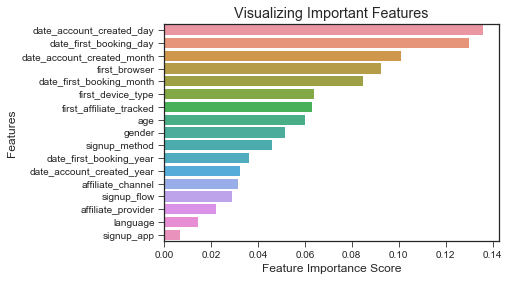

In [63]:
sns.barplot(x=imp_feature, y=imp_feature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [65]:
# Dropping columns in X_train and X_valid
X_train_imp = X_train.drop(["signup_app","language","affiliate_provider","signup_flow","date_account_created_year","date_first_booking_year"
                            ,"affiliate_channel","gender","signup_method","date_first_booking_day","date_first_booking_month"],axis=1)

X_valid_imp = X_valid.drop(["signup_app","language","affiliate_provider","signup_flow","date_account_created_year","date_first_booking_year"
                            ,"affiliate_channel","gender","signup_method","date_first_booking_day","date_first_booking_month"],axis=1)

# Random Forest on training data

In [66]:
X_train_imp.head(1)

,age,first_affiliate_tracked,first_device_type,first_browser,date_account_created_day,date_account_created_month
2,3.0,7,7,22,6,9


In [67]:
mod_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 100,
                                 bootstrap = True)
mod_1.fit(X_train_imp,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_prd_RF = mod_1.predict(X_valid_imp)
accuracy_score(Y_valid,y_prd)

0.6472699949908165

In [69]:
mod_2 = RandomForestClassifier(n_jobs = -1, n_estimators = 1000,
                                 bootstrap = True)
mod_2.fit(X_train_imp,Y_train)
y_prd2+RF = mod_2.predict(X_valid_imp)
accuracy_score(Y_valid,y_prd2)

0.649774586742361

In [70]:
mod_3 = RandomForestClassifier(n_jobs = -1, n_estimators = 2000,
                                 bootstrap = True)
mod_3.fit(X_train_imp,Y_train)
y_prd3_RF = mod_3.predict(X_valid_imp)
accuracy_score(Y_valid,y_prd3)

0.6525296376690599

# Gradient Boosting

In [67]:
mod_1_GB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=2,min_samples_split=2
                                      ,min_samples_leaf=4)
mod_1_GB.fit(X_train_imp,Y_train)
y_prd_GB = mod_1_GB.predict(X_valid_imp)
accuracy_score(Y_valid,y_prd)

0.7094673568208382

In [70]:
mod_2_GB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_depth=3,min_samples_split=2,min_samples_leaf=4)
mod_2_GB.fit(X_train_imp,Y_train)
y_prd2_GB = mod_2_GB.predict(X_valid_imp)
accuracy_score(Y_valid,y_prd2)

0.7095508432125563

In [72]:
X_test_imp = final_test.drop(["signup_app","language","affiliate_provider","signup_flow","date_account_created_year"
                            ,"affiliate_channel","gender","signup_method"],axis=1)

# XGBoost Classifier

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [72]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [74]:
xgb.fit(X_train_imp,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [75]:
y_predict=xgb.predict(X_valid_imp)

In [76]:
print(y_predict)

[1 1 1 ... 1 1 1]


In [77]:
accuracy = accuracy_score(Y_valid, y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.96%


### SELECTING MODEL WITH THE HIGESHT ACCURACY

In [73]:
y_prd_tst = mod_2_GB.predict(X_test_imp) 

In [74]:
y_prd_tst

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
e_dataframe = pd.DataFrame(y_prd_tst)

In [76]:
e_dataframe[0].unique()

array([1, 0], dtype=int64)

# CONFUSION MATRIX

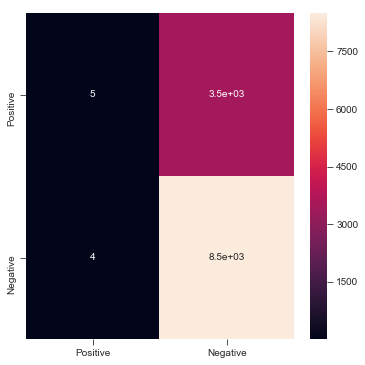

In [81]:
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,y_prd2_GB)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (6,6))
sns.heatmap(my_knn_df, xticklabels = ["Positive","Negative"],
            yticklabels = ["Positive","Negative"],annot = True)